<a href="https://colab.research.google.com/github/noshmachowdary/EduMorph/blob/main/Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset reformatted and saved in Google Drive!
Labels CSV preview:
      filename             breed
0  train_0.png       boston_bull
1  train_1.png             dingo
2  train_2.png          pekinese
3  train_3.png          bluetick
4  train_4.png  golden_retriever


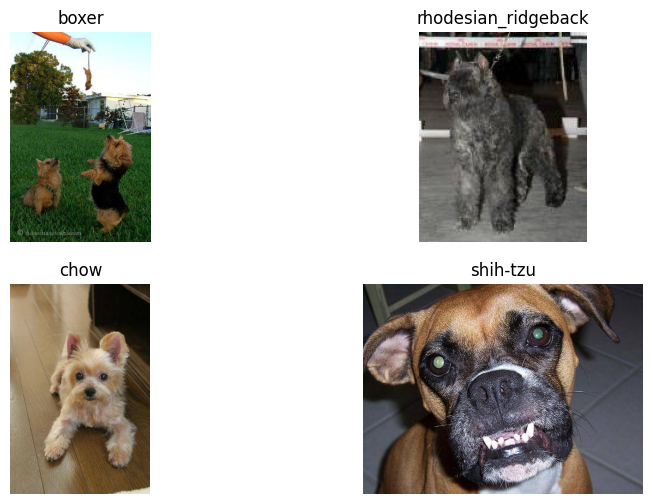

In [ ]:
# Step 1: Install HuggingFace Datasets
!pip install datasets -q

# Step 2: Import required libraries
from datasets import load_dataset
import os
import pandas as pd
import shutil
from google.colab import drive

# Step 3: Mount Google Drive
drive.mount('/content/drive')

# Step 4: Load dataset from HuggingFace
dataset = load_dataset("Saugatkafley/dog-breed-classification")

# ✅ Fix: Extract label names mapping
label_names = dataset['train'].features['label'].names

# Step 5: Create target directory in Google Drive
base_dir = "/content/drive/MyDrive/dog-breed-classification-dataset"
train_dir = os.path.join(base_dir, "train")
os.makedirs(train_dir, exist_ok=True)

# Step 6: Save images in train/{breed}/ format
labels = []
for idx, row in enumerate(dataset['train']):
    breed_id = row['label']                  # integer ID
    breed = label_names[breed_id]            # convert to breed name
    img = row['image']

    breed_dir = os.path.join(train_dir, breed)
    os.makedirs(breed_dir, exist_ok=True)

    img_filename = f"train_{idx}.png"
    img_path = os.path.join(breed_dir, img_filename)
    img.save(img_path)

    labels.append({"filename": img_filename, "breed": breed})

# Step 7: Save labels.csv
labels_df = pd.DataFrame(labels)
labels_csv_path = os.path.join(base_dir, "labels.csv")
labels_df.to_csv(labels_csv_path, index=False)

print("✅ Dataset reformatted and saved in Google Drive!")
print("Labels CSV preview:")
print(labels_df.head())

# Step 8: Display few images from train folder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_images = labels_df.sample(4)

plt.figure(figsize=(10, 6))
for i, row in enumerate(sample_images.itertuples(), 1):
    breed = row.breed
    filename = row.filename
    img_path = os.path.join(train_dir, breed, filename)

    plt.subplot(2, 2, i)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(breed)
    plt.axis("off")
plt.show()


In [ ]:
import os, pandas as pd, shutil
from tqdm import tqdm

base_dir = "/content/drive/MyDrive/dog-breed-identification"
train_src = "/content/dog-breed-identification/train"
labels_csv = "/content/dog-breed-identification/labels.csv"
os.makedirs(base_dir, exist_ok=True)

# Read and prepare labels
df = pd.read_csv(labels_csv)
df['id'] = df['id'].astype(str) + '.jpg'

train_target = os.path.join(base_dir, "train")
os.makedirs(train_target, exist_ok=True)

labels = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    src_img = os.path.join(train_src, row['id'])
    breed = row['breed']
    breed_dir = os.path.join(train_target, breed)
    os.makedirs(breed_dir, exist_ok=True)
    dst_img = os.path.join(breed_dir, row['id'])

    if os.path.abspath(src_img) != os.path.abspath(dst_img):
        shutil.copy(src_img, dst_img)

    labels.append({"filename": row['id'], "breed": breed})

# Save labels
labels_df = pd.DataFrame(labels)
labels_df.to_csv(os.path.join(base_dir, "labels.csv"), index=False)

# Create validation split
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    labels_df,
    test_size=0.1,
    stratify=labels_df['breed'],
    random_state=42
)

for df_subset, subset_name in [(train_df, 'train'), (val_df, 'val')]:
    subset_dir = os.path.join(base_dir, subset_name)
    for _, row in df_subset.iterrows():
        src = os.path.join(train_target, row['breed'], row['filename'])
        dst_dir = os.path.join(subset_dir, row['breed'])
        os.makedirs(dst_dir, exist_ok=True)
        dst = os.path.join(dst_dir, row['filename'])

        if os.path.abspath(src) != os.path.abspath(dst):
            shutil.copy(src, dst)

# Preview
print("✅ Dataset organized and saved to Google Drive.")
print("📄 Labels preview:\n", labels_df.head())
print("📁 Train samples:", len(train_df))
print("📁 Validation samples:", len(val_df))


100%|██████████| 10222/10222 [02:52<00:00, 59.38it/s]


✅ Dataset organized and saved to Google Drive.
📄 Labels preview:
                                filename             breed
0  000bec180eb18c7604dcecc8fe0dba07.jpg       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97.jpg             dingo
2  001cdf01b096e06d78e9e5112d419397.jpg          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d.jpg          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62.jpg  golden_retriever
📁 Train samples: 9199
📁 Validation samples: 1023


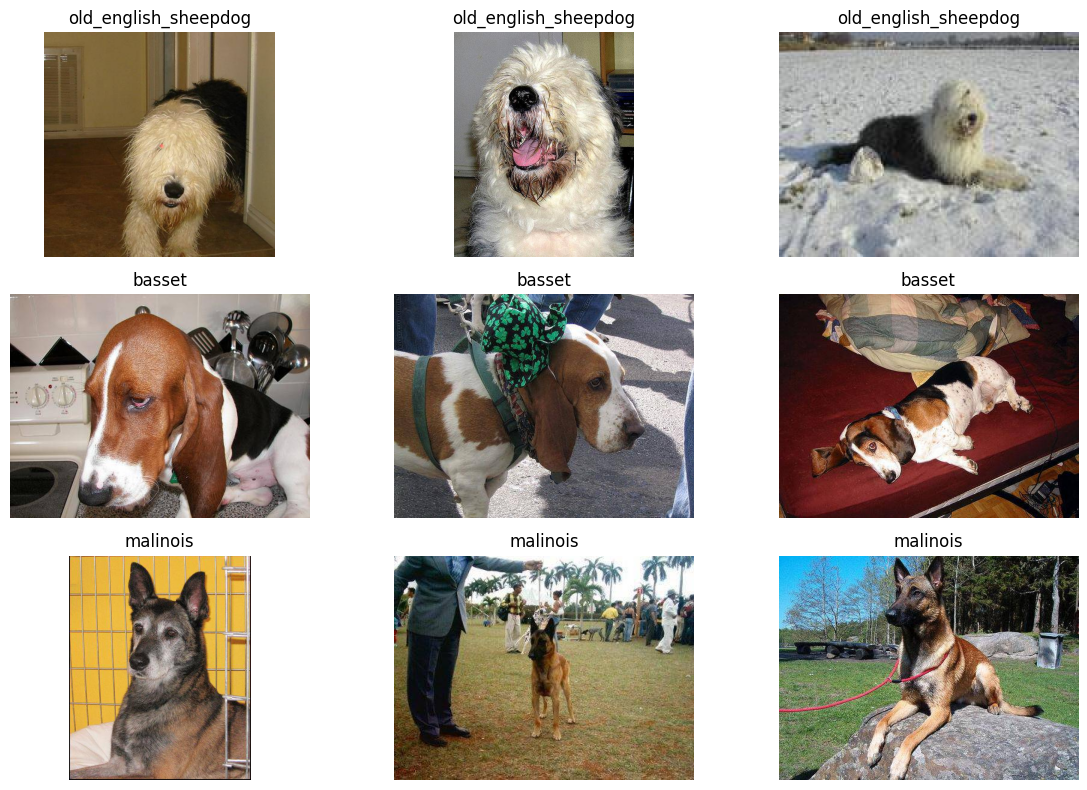

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Choose a few random breeds
breeds = labels_df['breed'].unique()
sample_breeds = random.sample(list(breeds), 3)  # Pick 3 random breeds

# Display 3 images per breed
fig, axes = plt.subplots(len(sample_breeds), 3, figsize=(12, 8))
for i, breed in enumerate(sample_breeds):
    breed_dir = os.path.join(base_dir, "train", breed)
    images = os.listdir(breed_dir)
    sample_images = random.sample(images, 3)

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(breed_dir, img_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(breed)

plt.tight_layout()
plt.show()


TASK 2

✅ Already extracted
📂 Folder contents: ['sample_submission.csv', 'test', 'labels.csv', 'train']
Labels shape: (10222, 2)
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
🐶 Top 10 breeds: ['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher', 'bernese_mountain_dog', 'shih-tzu', 'great_pyrenees', 'pomeranian', 'basenji', 'samoyed']


/tmp/ipython-input-985500504.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby("breed").apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)


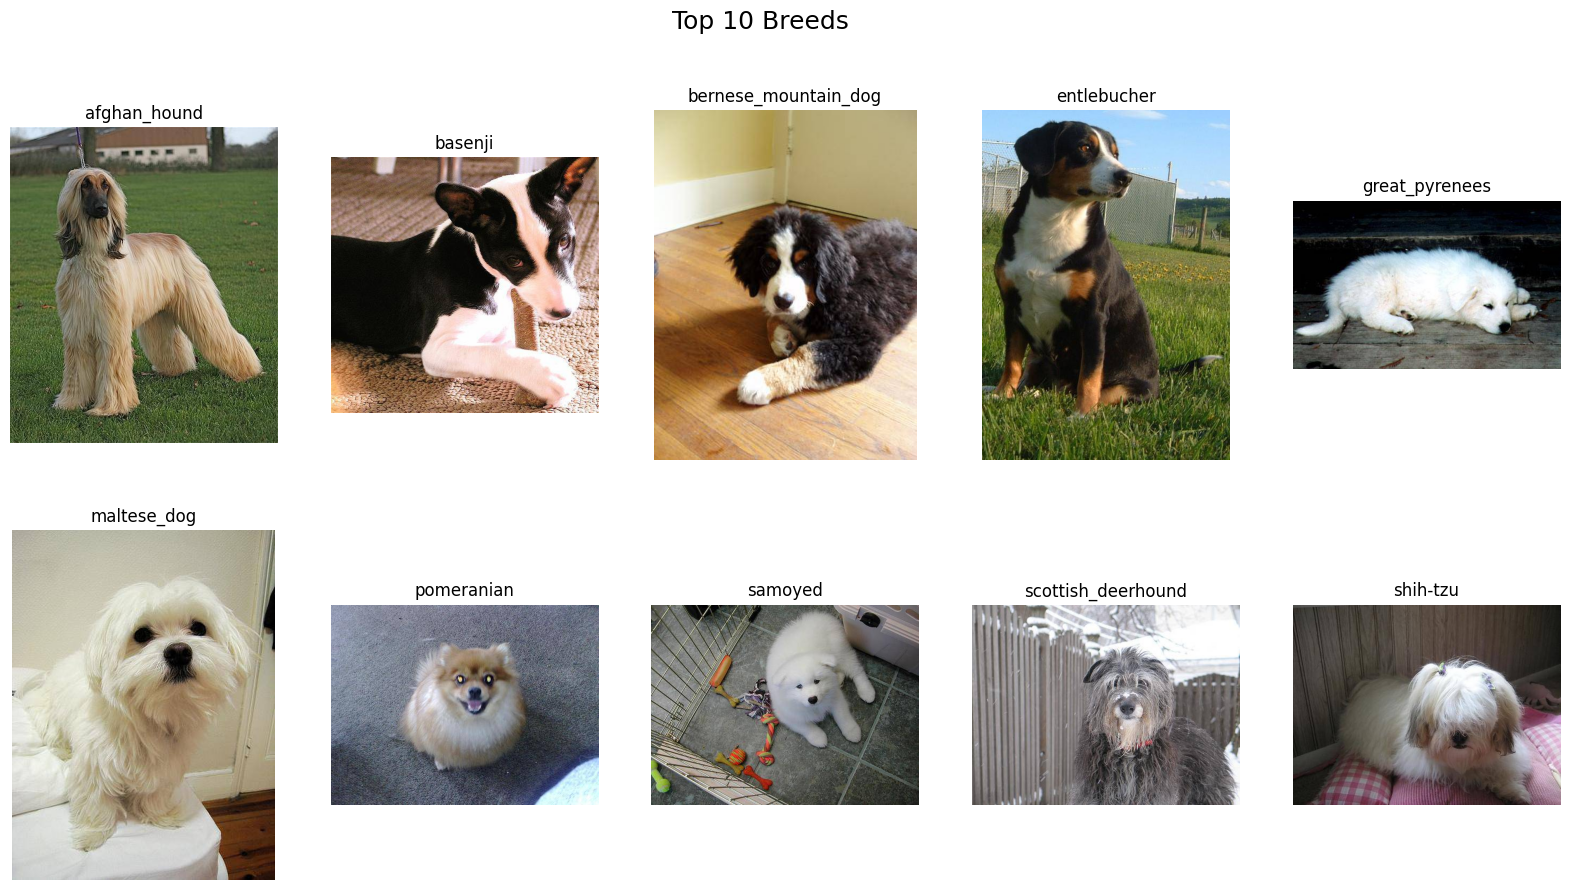

In [22]:
import zipfile, os

# Path where your dataset zip is stored in Drive
zip_path = "/content/drive/MyDrive/dog-breed-identification.zip"
extract_path = "/content/dog-breed-identification"

# Unzip only if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Files extracted")
else:
    print("✅ Already extracted")

print("📂 Folder contents:", os.listdir(extract_path))

import pandas as pd

labels_csv = os.path.join(extract_path, "labels.csv")
labels_df = pd.read_csv(labels_csv)

print("Labels shape:", labels_df.shape)
print(labels_df.head())

import matplotlib.pyplot as plt
import cv2
import random

# -------------------------------
# Step 1: Top 10 breeds
# -------------------------------
top_10_breeds = labels_df['breed'].value_counts().nlargest(10).index
top10_df = labels_df[labels_df['breed'].isin(top_10_breeds)]

print("🐶 Top 10 breeds:", top_10_breeds.tolist())


# -------------------------------
# Step 3: Helper function to show images
# -------------------------------
def show_images(df, title, img_folder, n=10):
    sample_df = df.groupby("breed").apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)
    plt.figure(figsize=(20, 10))
    for i, row in enumerate(sample_df.head(n).itertuples(), 1):
        img_path = os.path.join(img_folder, f"{row.id}.jpg")
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(2, 5, i)   # 2 rows, 5 cols
        plt.imshow(img)
        plt.title(row.breed, fontsize=12)
        plt.axis("off")

    plt.suptitle(title, fontsize=18)
    plt.show()

# -------------------------------
# Step 4: Visualize Top 10 breeds
# -------------------------------
train_dir = os.path.join(extract_path, "train")
show_images(top10_df, "Top 10 Breeds", train_dir)

🐕 Least 10 breeds: ['eskimo_dog', 'briard', 'golden_retriever', 'komondor', 'brabancon_griffon', 'walker_hound', 'german_shepherd', 'otterhound', 'giant_schnauzer', 'tibetan_mastiff']


/tmp/ipython-input-985500504.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby("breed").apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)


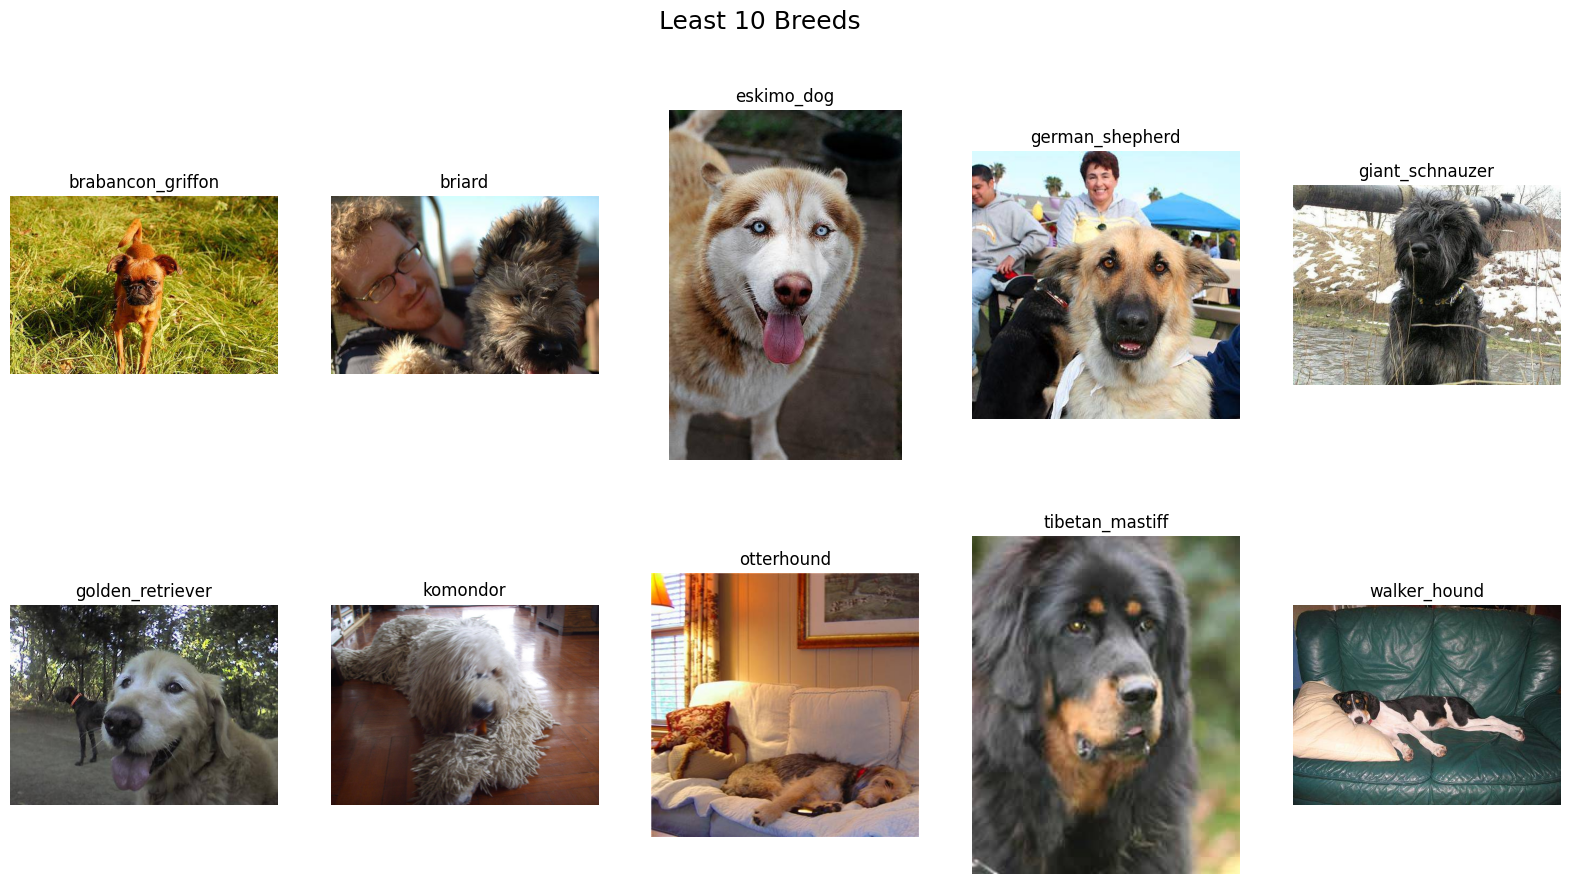

In [23]:
# -------------------------------
# Step 2: Least 10 breeds
# -------------------------------
least_10_breeds = labels_df['breed'].value_counts().nsmallest(10).index
least10_df = labels_df[labels_df['breed'].isin(least_10_breeds)]

print("🐕 Least 10 breeds:", least_10_breeds.tolist())
# -------------------------------
# Step 5: Visualize Least 10 breeds
# -------------------------------
show_images(least10_df, "Least 10 Breeds", train_dir)

TASK 3

In [8]:
import os
import pandas as pd
from PIL import Image
from tqdm import tqdm

# Function to collect dimensions into dataframe
def collect_image_data(folder, dataset_name):
    data = []
    files = os.listdir(folder)

    for fname in tqdm(files, desc=f"Processing {dataset_name}", unit="img"):
        fpath = os.path.join(folder, fname)
        try:
            with Image.open(fpath) as img:
                w, h = img.size
                data.append({"dataset": dataset_name, "width": w, "height": h})
        except:
            continue
    return pd.DataFrame(data)

# Collect train + test data
base_dir = '/content/dog-breed-identification'

# Define the specific paths for the train and test sets
train_folder = os.path.join(base_dir, 'train')
test_folder = os.path.join(base_dir, 'test')


# Collect train + test data from the correct subfolders
train_df = collect_image_data(train_folder, "train")
test_df  = collect_image_data(test_folder, "test")
# Combine into one dataframe
df = pd.concat([train_df, test_df], ignore_index=True)
df.head()


Processing test: 100%|██████████| 10357/10357 [00:11<00:00, 915.54img/s] 


dataset  width  height
0   train    500     375
1   train    375     500
2   train    218     240
3   train    500     375
4   train    500     375

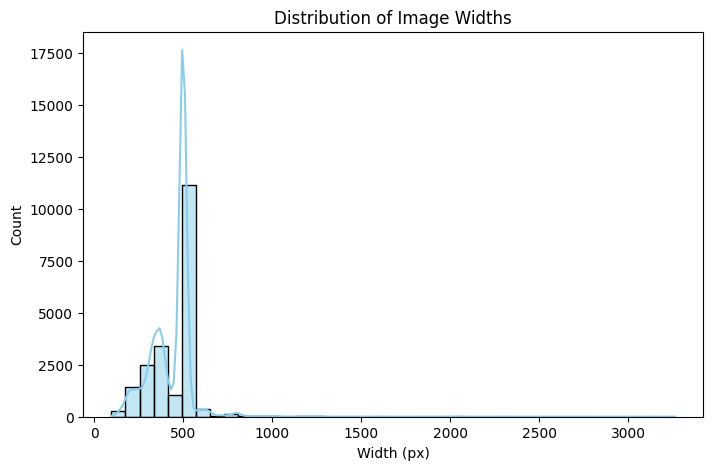

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Image Widths
plt.figure(figsize=(8,5))
sns.histplot(df['width'], bins=40, kde=True, color="skyblue")
plt.title("Distribution of Image Widths")
plt.xlabel("Width (px)")
plt.ylabel("Count")
plt.show()

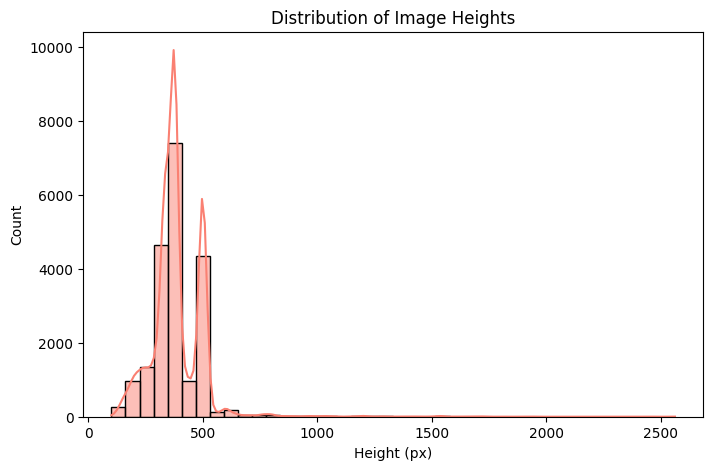

In [10]:
# 2. Distribution of Image Heights
plt.figure(figsize=(8,5))
sns.histplot(df['height'], bins=40, kde=True, color="salmon")
plt.title("Distribution of Image Heights")
plt.xlabel("Height (px)")
plt.ylabel("Count")
plt.show()

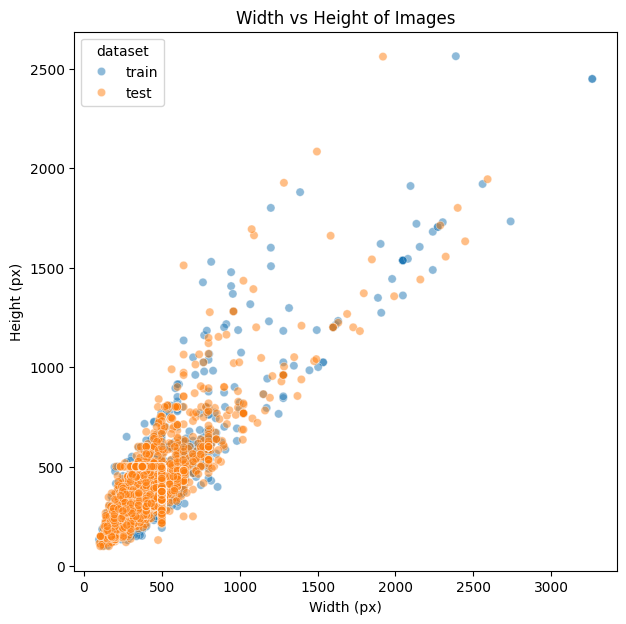

In [11]:
# 3. Width vs Height Scatter Plot
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="width", y="height", hue="dataset", alpha=0.5)
plt.title("Width vs Height of Images")
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.show()

/tmp/ipython-input-822441831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="dataset", y="width", palette="Set2")


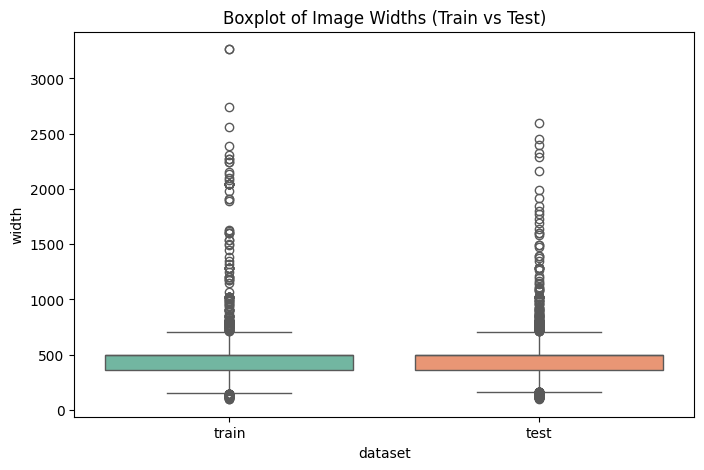

In [12]:
# 4. Boxplot of Widths by Dataset
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="dataset", y="width", palette="Set2")
plt.title("Boxplot of Image Widths (Train vs Test)")
plt.show()

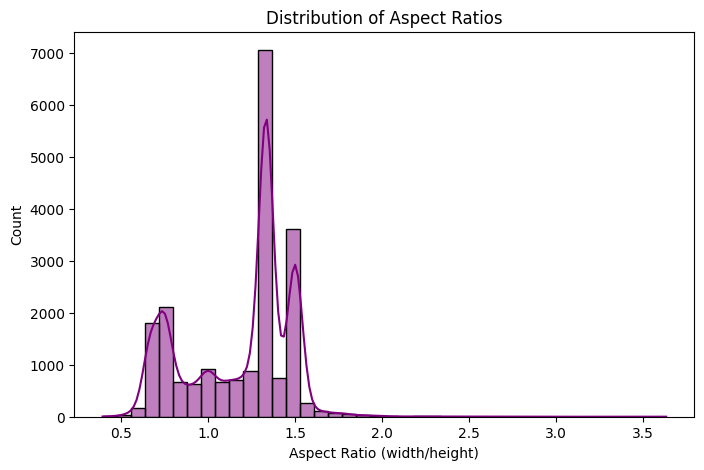

In [13]:
# 5. Aspect Ratio Distribution
df["aspect_ratio"] = df["width"] / df["height"]
plt.figure(figsize=(8,5))
sns.histplot(df["aspect_ratio"], bins=40, kde=True, color="purple")
plt.title("Distribution of Aspect Ratios")
plt.xlabel("Aspect Ratio (width/height)")
plt.ylabel("Count")
plt.show()

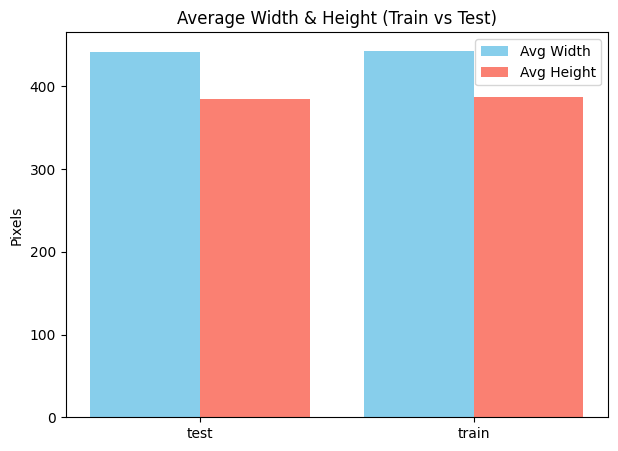

In [14]:
# ✅ Average size stats
avg_stats = df.groupby("dataset")[["width", "height"]].mean().reset_index()

# ✅ Plot bar chart
plt.figure(figsize=(7,5))
x = range(len(avg_stats))

plt.bar(x, avg_stats["width"], width=0.4, label="Avg Width", color="skyblue")
plt.bar([i+0.4 for i in x], avg_stats["height"], width=0.4, label="Avg Height", color="salmon")

plt.xticks([i+0.2 for i in x], avg_stats["dataset"])
plt.ylabel("Pixels")
plt.title("Average Width & Height (Train vs Test)")
plt.legend()
plt.show()

/tmp/ipython-input-1506898828.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=breed_counts.head(120).index, y=breed_counts.head(120).values, palette="viridis")


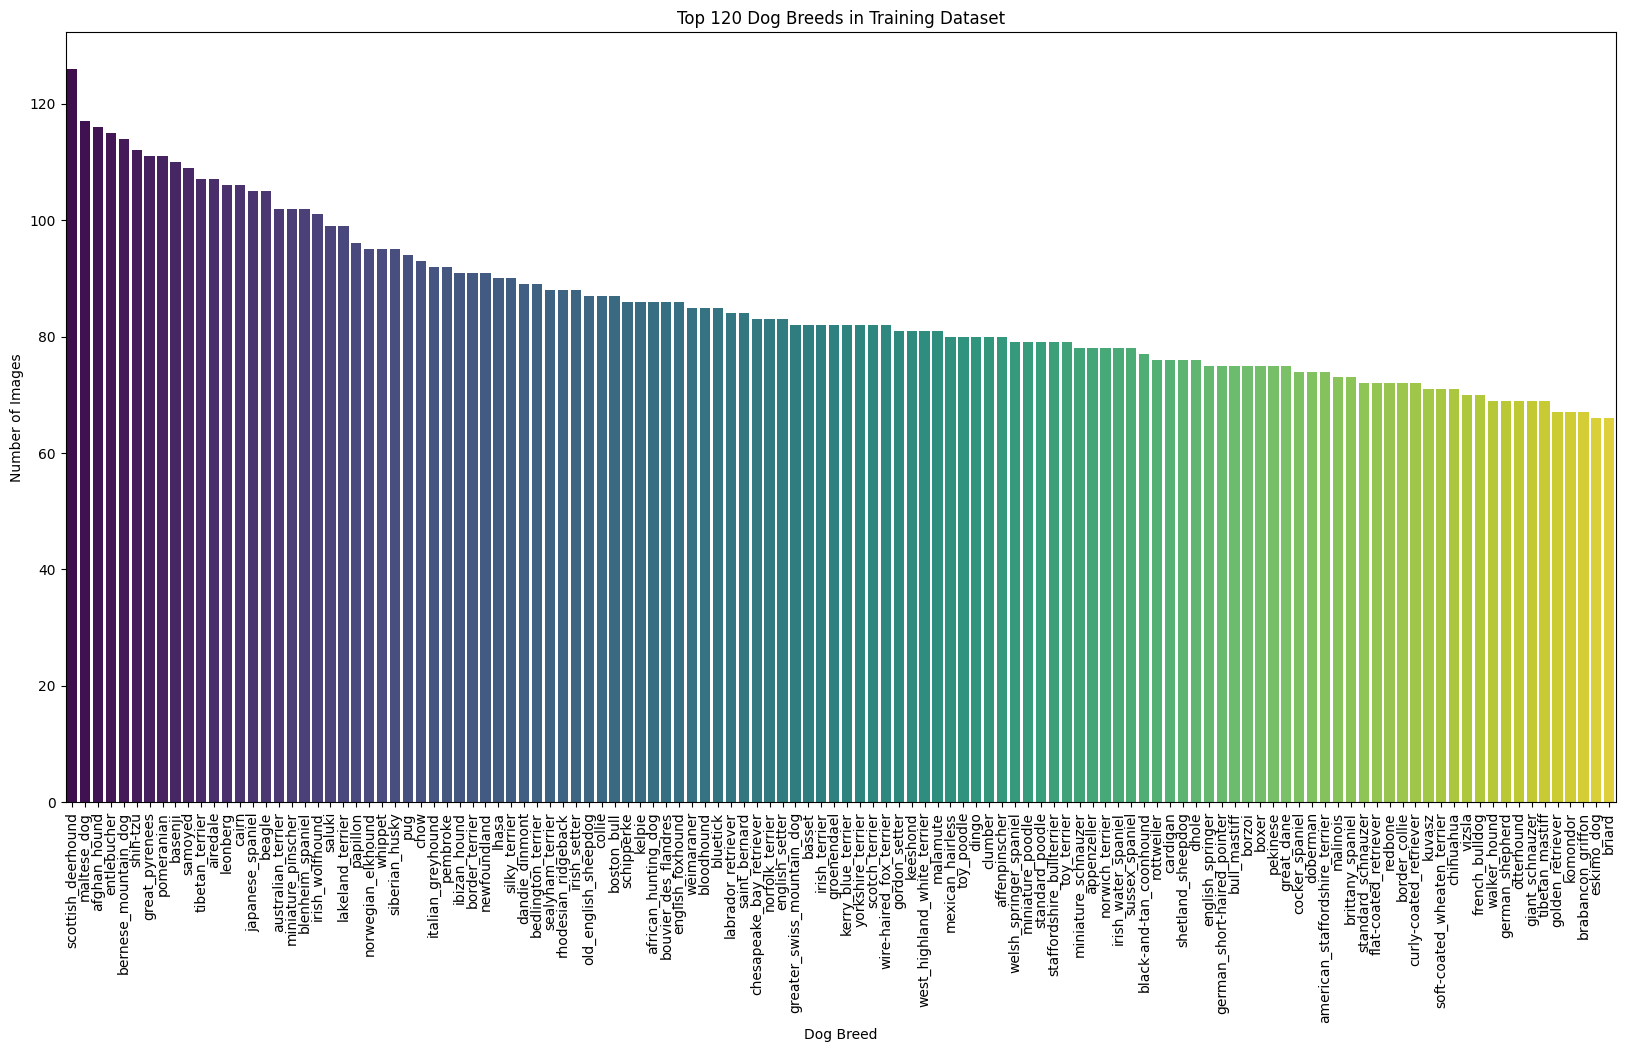

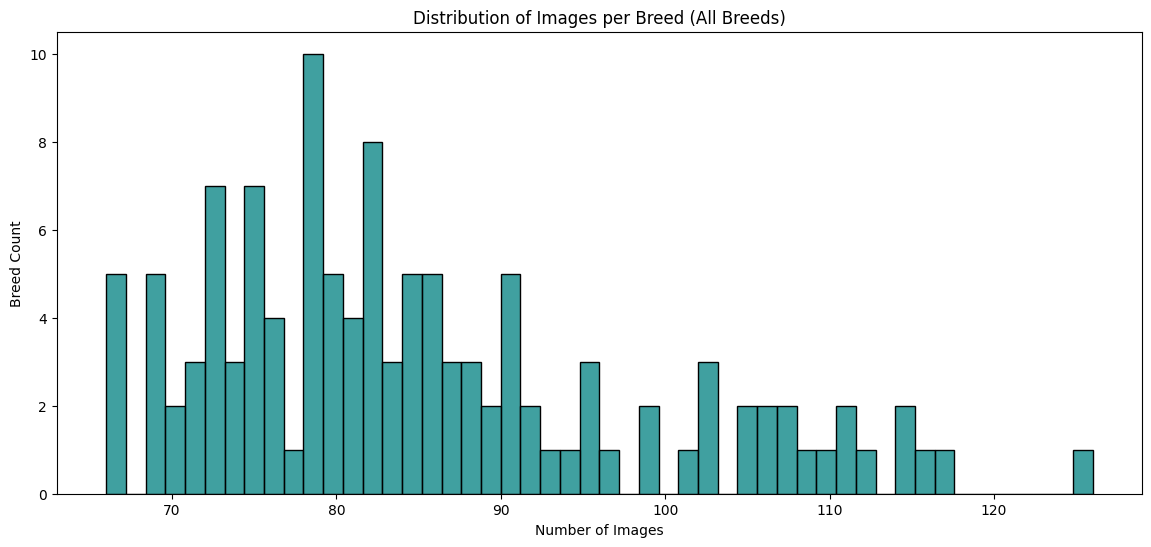

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Path to labels.csv

base_path = "/content/dog-breed-identification"
labels_csv = os.path.join(base_path, "labels.csv")
labels_df = pd.read_csv(labels_csv)

# ---------- Count images per breed ----------
breed_counts = labels_df["breed"].value_counts()

# ---------- Plot Top 120 breeds ----------
plt.figure(figsize=(20,10))
sns.barplot(x=breed_counts.head(120).index, y=breed_counts.head(120).values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 120 Dog Breeds in Training Dataset")
plt.xlabel("Dog Breed")
plt.ylabel("Number of Images")
plt.show()

# ---------- Plot Overall Distribution ----------
plt.figure(figsize=(14,6))
sns.histplot(breed_counts, bins=50, kde=False, color="teal")
plt.title("Distribution of Images per Breed (All Breeds)")
plt.xlabel("Number of Images")
plt.ylabel("Breed Count")
plt.show()

In [9]:
import os
import pandas as pd
from PIL import Image
from tqdm import tqdm
import zipfile, os

# Path where your dataset zip is stored in Drive
zip_path = "/content/drive/MyDrive/dog-breed-identification.zip"
extract_path = "/content/dog-breed-identification"

# Unzip only if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Files extracted")
else:
    print("✅ Already extracted")
# Function to collect dimensions into dataframe
# This function is correct and does not need changes.
def collect_image_data(folder, dataset_name):
    """
    Scans a folder for images, collects their dimensions,
    and returns the data as a Pandas DataFrame.
    """
    data = []
    # Check if the folder exists to prevent errors
    if not os.path.isdir(folder):
        print(f"Error: Directory not found at '{folder}'")
        return pd.DataFrame(data)

    files = os.listdir(folder)

    for fname in tqdm(files, desc=f"Processing {dataset_name}", unit="img"):
        fpath = os.path.join(folder, fname)
        try:
            # Using 'with' ensures the file handle is properly closed
            with Image.open(fpath) as img:
                w, h = img.size
                data.append({"dataset": dataset_name, "width": w, "height": h, "filename": fname})
        except Exception as e:
            # It's good practice to know why an image failed to open
            print(f"Could not read image {fpath}: {e}")
            continue

    return pd.DataFrame(data)

# --- CORRECTION IS HERE ---

# Define the base directory
base_dir = '/content/dog-breed-identification'

# Define the specific paths for the train and test sets
train_folder = os.path.join(base_dir, 'train')
test_folder = os.path.join(base_dir, 'test')


# Collect train + test data from the correct subfolders
train_df = collect_image_data(train_folder, "train")
test_df  = collect_image_data(test_folder, "test")

# --- END OF CORRECTION ---

# Combine into one dataframe
if not train_df.empty or not test_df.empty:
    df = pd.concat([train_df, test_df], ignore_index=True)
    print("\nSuccessfully combined dataframes.")
    print("Combined DataFrame head:")
    print(df.head())
    print(f"\nTotal images processed: {len(df)}")
else:
    print("\nCould not process any images. The final dataframe is empty.")

✅ Files extracted


Processing test: 100%|██████████| 10357/10357 [00:00<00:00, 12245.34img/s]


Successfully combined dataframes.
Combined DataFrame head:
  dataset  width  height                              filename
0   train    500     375  8801d91c9e4a26fd20adccecf75291dd.jpg
1   train    375     500  0964a2558fc9aa293a6a934d49f64968.jpg
2   train    218     240  f37bcde663c39b566fb9ce69c074a7e8.jpg
3   train    500     375  01680178ca6664294efb493a46014a82.jpg
4   train    500     375  1fbe78c5135f73d021aaa756ca69fe95.jpg

Total images processed: 20579


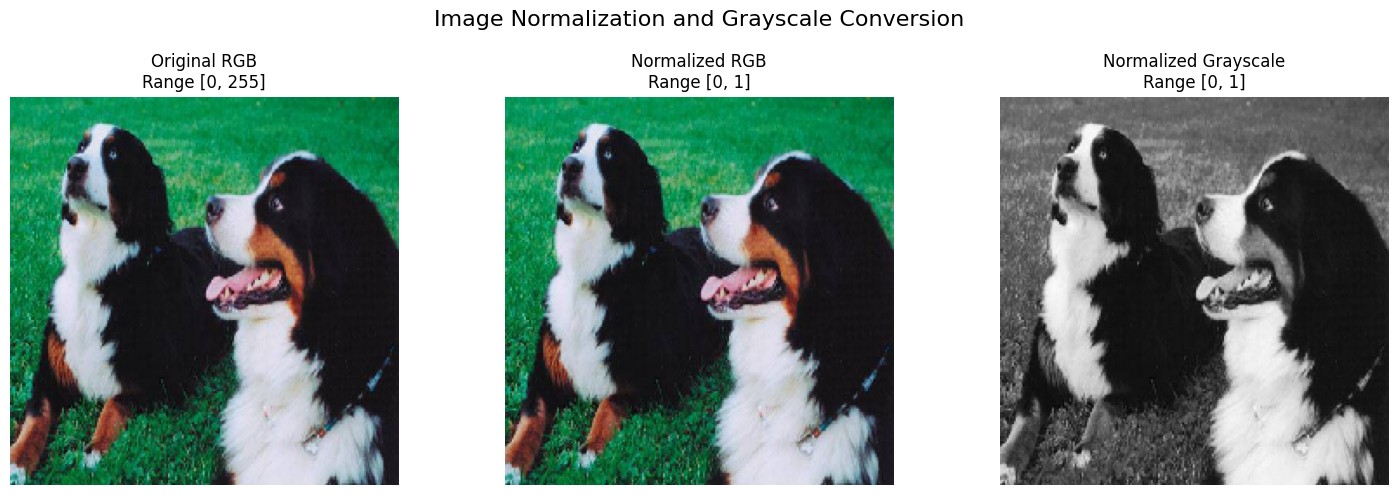

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# --- Define the path to your specific image ---
image_filename = "fd5c9929ec93b09977a9565bd94b5672.jpg"
train_folder = '/content/dog-breed-identification/train'
image_path = os.path.join(train_folder, image_filename)

# --- Check if the file exists ---
if not os.path.exists(image_path):
    print(f"Error: The file '{image_filename}' was not found in '{train_folder}'.")
else:
    img_size = (224, 224)

    # --- 1. Load Original RGB Image ---
    original_rgb_img = load_img(image_path, target_size=img_size)

    # --- 2. Create Normalized RGB Image ---
    rgb_array = img_to_array(original_rgb_img)
    rgb_batch = np.expand_dims(rgb_array, axis=0)

    # Generator for normalization
    datagen = ImageDataGenerator(rescale=1./255)

    # Create normalized RGB iterator and get the image
    norm_rgb_iterator = datagen.flow(rgb_batch, batch_size=1)
    normalized_rgb_array = next(norm_rgb_iterator)[0]

    # --- 3. Create Normalized Grayscale Image ---
    # Load the image directly in grayscale mode
    grayscale_img = load_img(image_path, target_size=img_size, color_mode="grayscale")
    gray_array = img_to_array(grayscale_img)
    gray_batch = np.expand_dims(gray_array, axis=0)

    # Create normalized grayscale iterator and get the image
    norm_gray_iterator = datagen.flow(gray_batch, batch_size=1)
    normalized_gray_array = next(norm_gray_iterator)[0]


    # --- 4. Display all three images ---
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Original
    axes[0].imshow(original_rgb_img)
    axes[0].set_title("Original RGB\nRange [0, 255]")
    axes[0].axis('off')

    # Normalized RGB
    axes[1].imshow(normalized_rgb_array)
    axes[1].set_title("Normalized RGB\nRange [0, 1]")
    axes[1].axis('off')

    # Normalized Grayscale
    # Use cmap='gray' to display the single-channel image correctly
    axes[2].imshow(np.squeeze(normalized_gray_array), cmap='gray')
    axes[2].set_title("Normalized Grayscale\nRange [0, 1]")
    axes[2].axis('off')

    plt.suptitle("Image Normalization and Grayscale Conversion", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


--- Image Augmentation ---


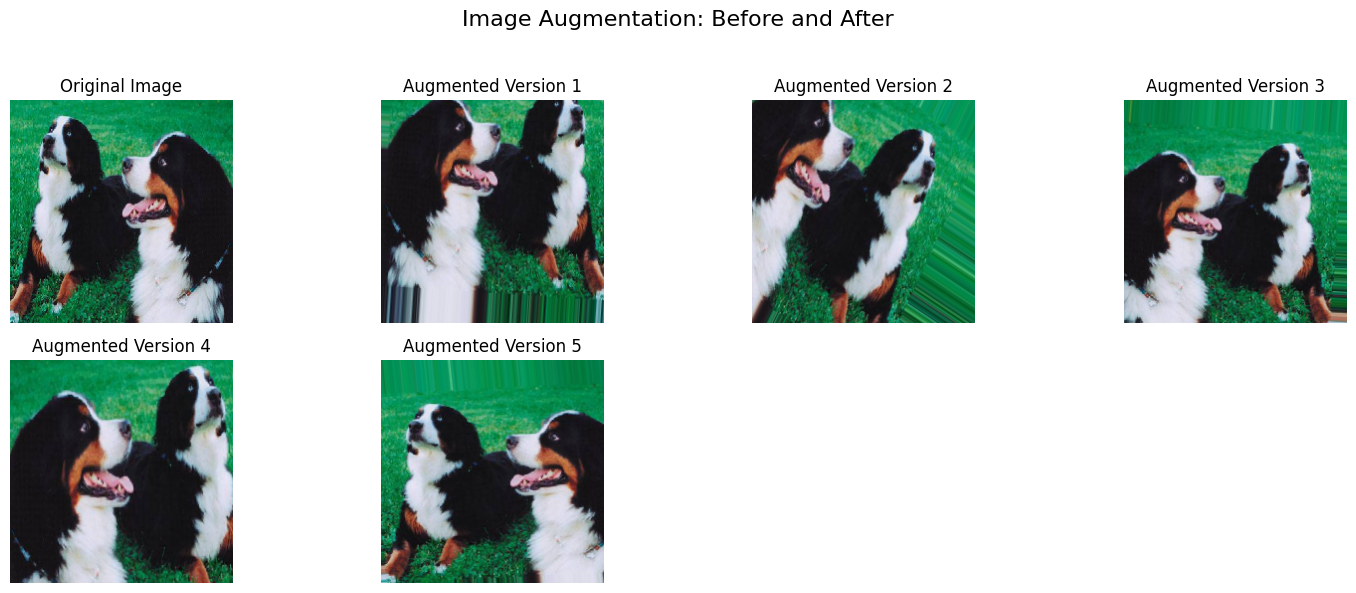

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# --- Define the path to your specific image ---
image_filename = "fd5c9929ec93b09977a9565bd94b5672.jpg"
train_folder = '/content/dog-breed-identification/train'
image_path = os.path.join(train_folder, image_filename)

if not os.path.exists(image_path):
    print(f"Error: The file '{image_filename}' was not found.")
else:
    # --- Load and prepare the image ---
    img_size = (224, 224)
    original_img = load_img(image_path, target_size=img_size)
    image_array = img_to_array(original_img)
    image_batch = np.expand_dims(image_array, axis=0)

    # --- 1. Define the Augmentation Generator ---
    # This generator includes normalization (`rescale`) plus many transformations.
    aug_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # --- 2. Create the Iterator ---
    aug_iterator = aug_datagen.flow(image_batch, batch_size=1)

    # --- Display Before vs. After Augmentation ---
    print("\n--- Image Augmentation ---")

    # Create a plot with the original image and 5 augmented versions
    plt.figure(figsize=(15, 6))

    # Before
    plt.subplot(2, 4, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis('off')

    # After: Generate and display 5 different augmented images
    for i in range(5):
        augmented_img_array = next(aug_iterator)[0]
        plt.subplot(2, 4, i + 2)
        plt.imshow(augmented_img_array)
        plt.title(f"Augmented Version {i+1}")
        plt.axis('off')

    plt.suptitle("Image Augmentation: Before and After", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# --- Define the path to your specific image ---
image_filename = "fd5c9929ec93b09977a9565bd94b5672.jpg"
train_folder = '/content/dog-breed-identification/train'
image_path = os.path.join(train_folder, image_filename)

# --- Load and prepare the image (this will be our "Before" image) ---
if not os.path.exists(image_path):
    print(f"Error: The file '{image_filename}' was not found in '{train_folder}'.")
else:
    img_size = (224, 224)
    original_img = load_img(image_path, target_size=img_size)
    image_array = img_to_array(original_img)
    image_batch = np.expand_dims(image_array, axis=0)
    print("Image loaded successfully. You can now run the augmentation blocks.")

# Helper function to plot the comparisons
def plot_augmentations(datagen, title):
    """Takes a generator and plots the original vs. 5 augmented versions."""
    if 'original_img' not in globals():
        print("Please run the setup block first to load the image.")
        return

    iterator = datagen.flow(image_batch, batch_size=1)

    plt.figure(figsize=(12, 4))

    # Plot Original Image
    plt.subplot(1, 6, 1)
    plt.imshow(original_img)
    plt.title("Original")
    plt.axis('off')

    # Plot 5 augmented examples
    for i in range(5):
        augmented_img = next(iterator)[0]
        plt.subplot(1, 6, i + 2)
        plt.imshow(augmented_img)
        plt.title(f"After #{i+1}")
        plt.axis('off')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

Image loaded successfully. You can now run the augmentation blocks.


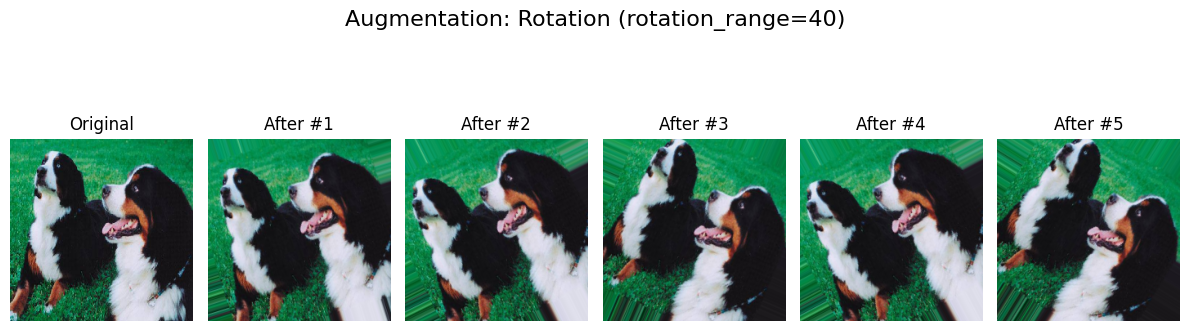

In [14]:
# ROTATION
# Randomly rotates the image from -40 to +40 degrees.
rotation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40
)

# --- Plot Before and After ---
plot_augmentations(rotation_datagen, "Augmentation: Rotation (rotation_range=40)")

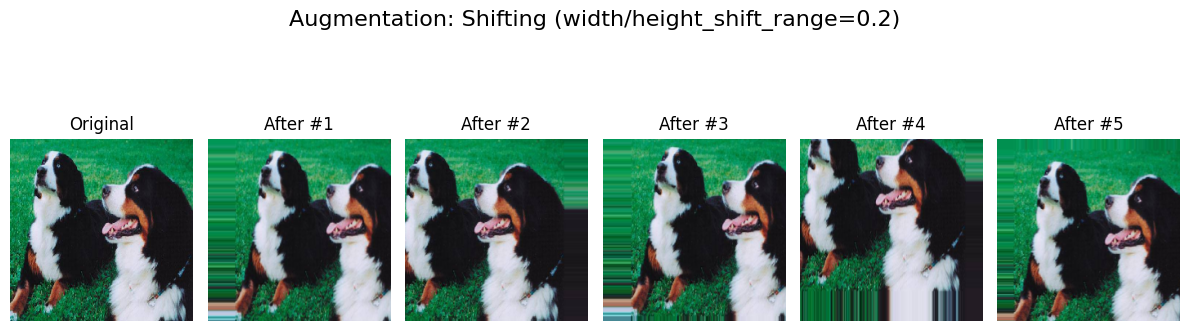

In [15]:
# SHIFTING
# Shifts width and height by up to 20% of the image dimension.
shift_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2
)

# --- Plot Before and After ---
plot_augmentations(shift_datagen, "Augmentation: Shifting (width/height_shift_range=0.2)")

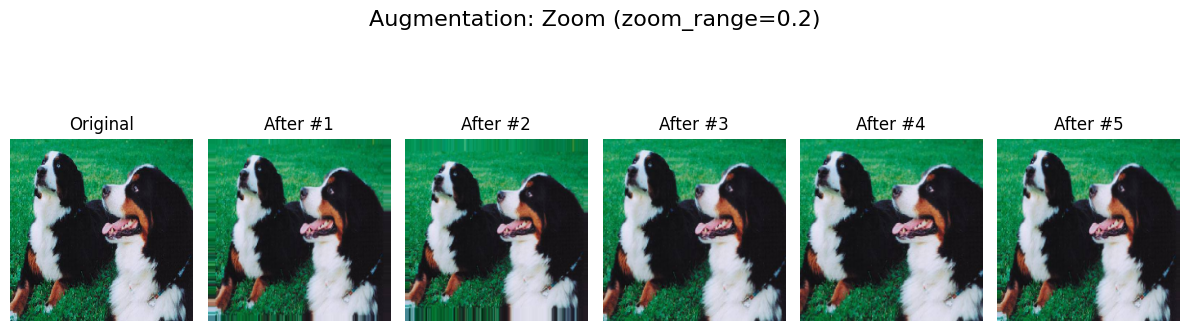

In [16]:
# ZOOMING
# Randomly zooms the image. Range is [1-0.2, 1+0.2] => [0.8, 1.2]
zoom_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2
)

# --- Plot Before and After ---
plot_augmentations(zoom_datagen, "Augmentation: Zoom (zoom_range=0.2)")

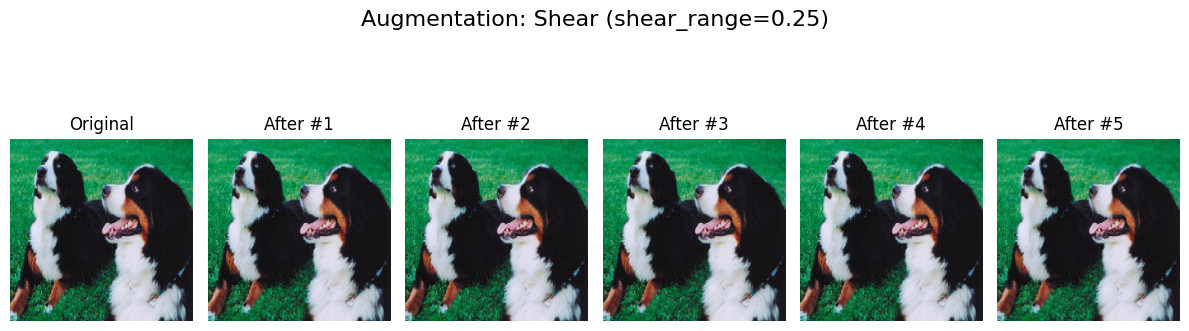

In [17]:
# SHEARING
# Shears the image by a counter-clockwise angle in degrees.
shear_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.25 # A noticeable shear
)

# --- Plot Before and After ---
plot_augmentations(shear_datagen, "Augmentation: Shear (shear_range=0.25)")

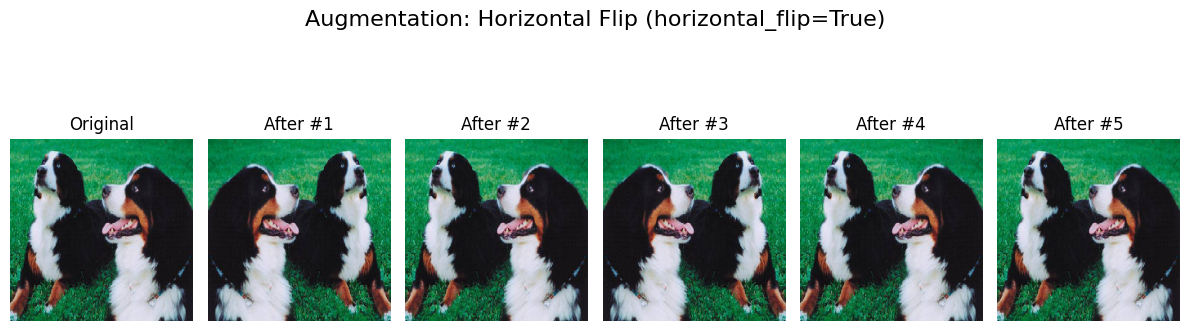

In [18]:
# Flipping
# `True` means the flip will be applied to roughly 50% of the images.
flip_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

# --- Plot Before and After ---
# Note: Since this is a 50/50 chance, you might see the original image
# in the "After" slots if it wasn't flipped for that iteration.
plot_augmentations(flip_datagen, "Augmentation: Horizontal Flip (horizontal_flip=True)")

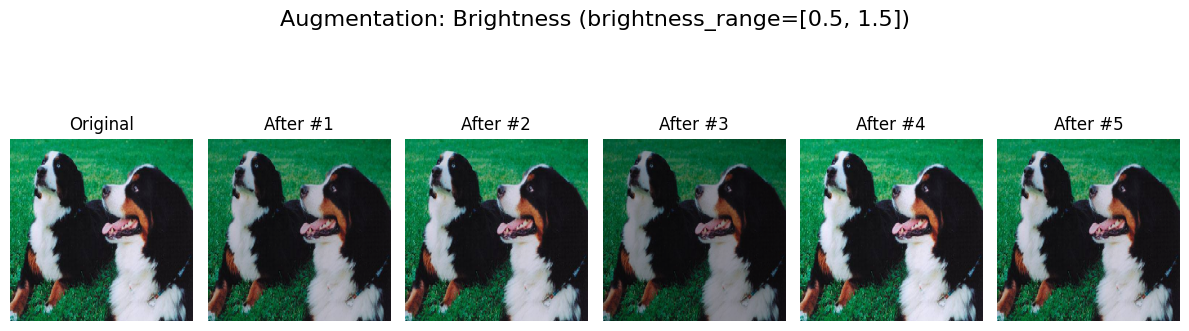

In [20]:
#BRIGHTNESS
# Values < 1.0 darken the image, values > 1.0 brighten it.
brightness_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.5, 1.5]
)

# --- Plot Before and After ---
plot_augmentations(brightness_datagen, "Augmentation: Brightness (brightness_range=[0.5, 1.5])")